In [ ]:
# importing all libraries there that will be used in this project

# to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# let's load the dataset
df = pd.read_csv('/content/Unemployment in India.csv')
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [ ]:
# let's print the first five rows of data
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
# View the last 5 rows

df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
 #View the number of rows and columns

print(f'The dataset has {df.shape[0]} rows')
print(f'The dataset has {df.shape[1]} columns')

The dataset has 267 rows
The dataset has 9 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
## Checking unique values in columns
b={}
for i in df.columns: # Replace 'df19' with 'df' if that's the DataFrame you want to use
    b.update({i:df[i].nunique()})
print(b)

{'States': 27, 'Date': 10, 'Frequency': 1, 'Est_Unemp_Rate': 252, 'Est_Emp': 247, 'Est_Labour_Rate': 248, 'Region.1': 5, 'longitude': 27, 'latitude': 24, 'Year': 1}


In [ ]:
# Check the columns

df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
## Checking description and count of unique values in columns
for i in df.columns:

    print(df[i].value_counts())

States
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64
Date
2020-03-31    27
2020-05-31    27
2020-06-30    27
2020-07-31    27
2020-08-31    27
2020-09-30    27
2020-10-31    27
2020-01-31    26
2020-02-29    26
2020-04-30    26
Name: count, dtype: int64
Frequency
 M    267
Name: count, dtype: int64
Est_Unemp_Rate
5.79     4
2.86     3
1.58     2
10.97    2
10.61    2
        ..
21.08    1
20.78  

In [ ]:
df.shape

(267, 9)

In [ ]:
# Assuming 'df' is the DataFrame you intend to use
CAT_COLS = [col for col in df if df[col].dtype =="O"]
NUM_COLS = [col for col in df if df[col].dtype !="O"]

print(f"No. of categorical Columns:{len(CAT_COLS)}")
print(f"No. of numerical Columns:{len(NUM_COLS)}")

No. of categorical Columns:3
No. of numerical Columns:7


In [ ]:
df.columns=df.columns.str.strip()
df

,States,Date,Frequency,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Region.1,longitude,latitude,Year
0,Andhra Pradesh,2020-01-31,M,5.48,16.64,41.02,South,15.9129,79.740,2020
1,Andhra Pradesh,2020-02-29,M,5.83,16.55,40.90,South,15.9129,79.740,2020
2,Andhra Pradesh,2020-03-31,M,5.79,15.88,39.18,South,15.9129,79.740,2020
3,Andhra Pradesh,2020-04-30,M,20.51,11.34,33.10,South,15.9129,79.740,2020
4,Andhra Pradesh,2020-05-31,M,17.43,12.99,36.46,South,15.9129,79.740,2020
...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30.73,40.39,East,22.9868,87.855,2020
263,West Bengal,2020-07-31,M,6.83,35.37,46.17,East,22.9868,87.855,2020
264,West Bengal,2020-08-31,M,14.87,33.30,47.48,East,22.9868,87.855,2020
265,West Bengal,2020-09-30,M,9.35,35.71,47.73,East,22.9868,87.855,2020


In [ ]:
# Renaming the columns for easier access

df = df.rename(columns={'Region' : 'States', ' Date' : 'Date',' Frequency': 'Frequency' ,
                        ' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp',
                        ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)


# Rounding estimated employed column for a better visualizing

df['Est_Emp'] = round((df['Est_Emp']/1000000),2)

df.head(2)

,States,Date,Frequency,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16.64,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16.55,40.90,South,15.9129,79.74


In [ ]:
# drop missing values
df.dropna(axis = 0, inplace = True)
# again check for missing values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
# Checking for percentage of missing value

round(df.isnull().sum()/df.shape[0]*100,2)

States             0.0
Date               0.0
Frequency          0.0
Est_Unemp_Rate     0.0
Est_Emp            0.0
Est_Labour_Rate    0.0
Region.1           0.0
longitude          0.0
latitude           0.0
dtype: float64

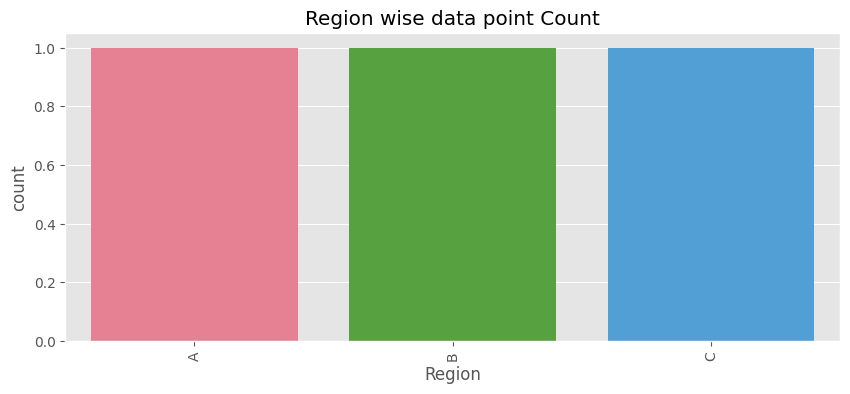

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is the dictionary containing your data
df19 = pd.DataFrame(data)

## Region wise data point Count
plt.figure(figsize = (10,4))
sns.countplot(df19, x="Region", palette="husl").tick_params(axis="x", rotation=90)
plt.title("Region wise data point Count")
plt.show()

In [ ]:
# Bar Plot of Average Estimated Unemployment Rate
fig = px.bar(df, x = "Region", y = " Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()


In [ ]:
# Descriptive Statistics

df_stat = df[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate']]
round(df_stat.describe(),2)


,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate
count,267.00,267.00,267.00
mean,12.24,13.96,41.68
std,10.80,13.37,7.85
min,0.50,0.12,16.77
25%,4.84,2.84,37.26
50%,9.65,9.73,40.39
75%,16.76,21.88,44.06
max,75.85,59.43,69.69


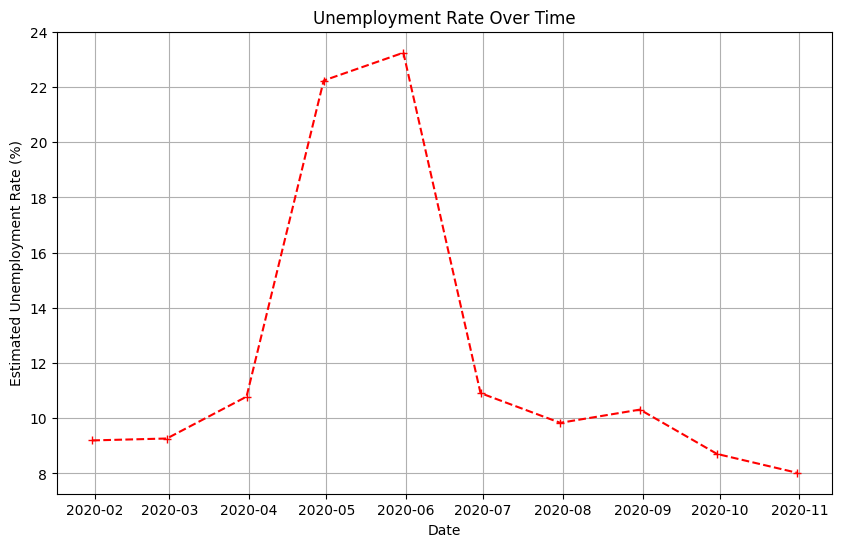

In [ ]:
# Grouping the data by 'Date' and calculate the mean unemployment rate for each date

mean_unemployment_over_time = df.groupby('Date')['Est_Unemp_Rate'].mean()

# Create a line plot

plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='+', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()


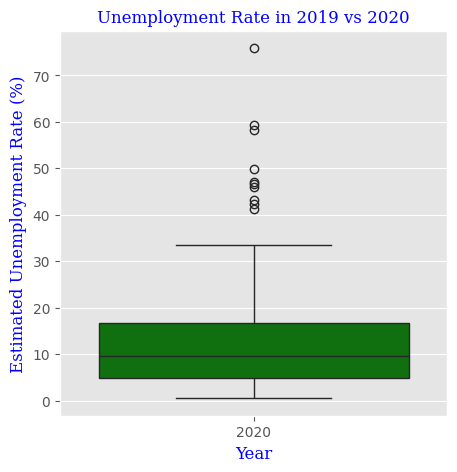

In [ ]:
# Analysing the 'Estimated Unemployment Rate' column using Boxplot for years 2019 and 2020

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year  # Assuming 'Date' is a datetime column

plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.boxplot(y = df['Est_Unemp_Rate'], x = df['Year'], color ='green')

font = {'family': 'serif', 'color': 'blue', 'weight': 'normal', 'size': 12}
plt.xlabel('Year', fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Unemployment Rate in 2019 vs 2020', fontdict=font)
plt.show()

In [ ]:
# Bar Plot of people employed in each region
fig = px.bar(df, x = "Region", y = " Estimated Employed", color = "Region", title = "People employed in each region")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()


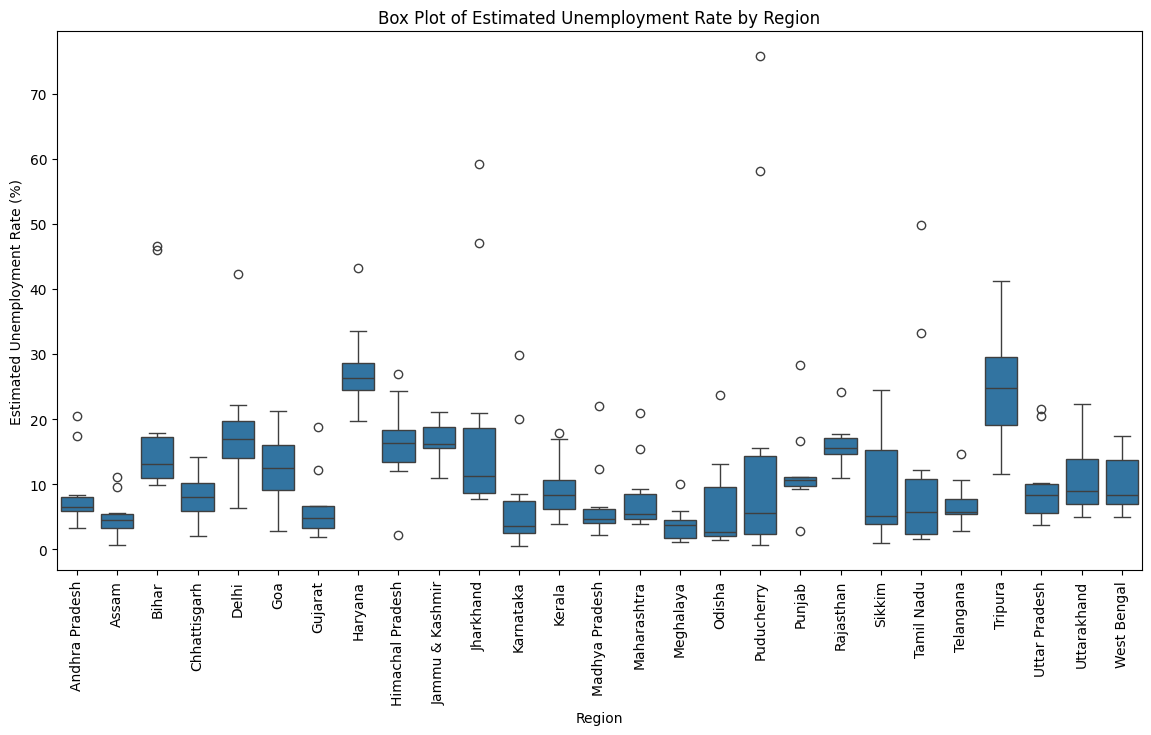

In [ ]:
plt.figure(figsize=(14, 7))
# Create the box plot with separate colors for each region
sns.boxplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df)
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Add title and axis labels
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')

# Show the plot
plt.show()

In [ ]:
# Box plot of Unemployment Rate by State

fig = px.box(df, x='States', y='Est_Unemp_Rate', color='States',
             labels={'States' : 'States', 'Est_Unemp_Rate' : 'Unemployment Rate (%)'},
             title='Unemployment Rate Per States', template='plotly')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

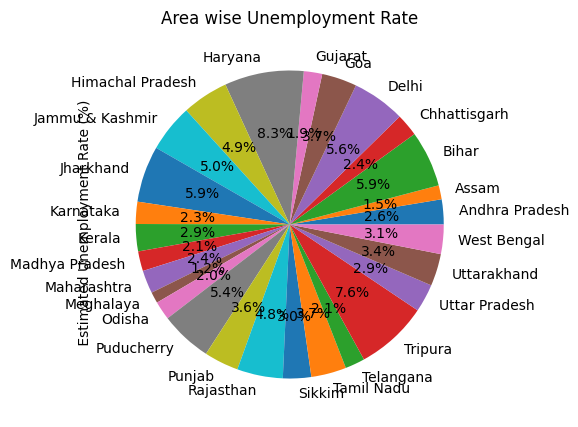

In [ ]:
# area wise unemployment rate using pie chart
plt.figure(figsize=(10,5))

# For example, if the column is named 'Region', use:
df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Area wise Unemployment Rate')
plt.show()

In [ ]:
fig = px.sunburst(df, path=['Region.1', 'States'], values='Est_Unemp_Rate',
                  title='Sunburst Plot of Estimated Unemployment Rate by States and Area',
                  height=650, template='ggplot2')
fig.show()

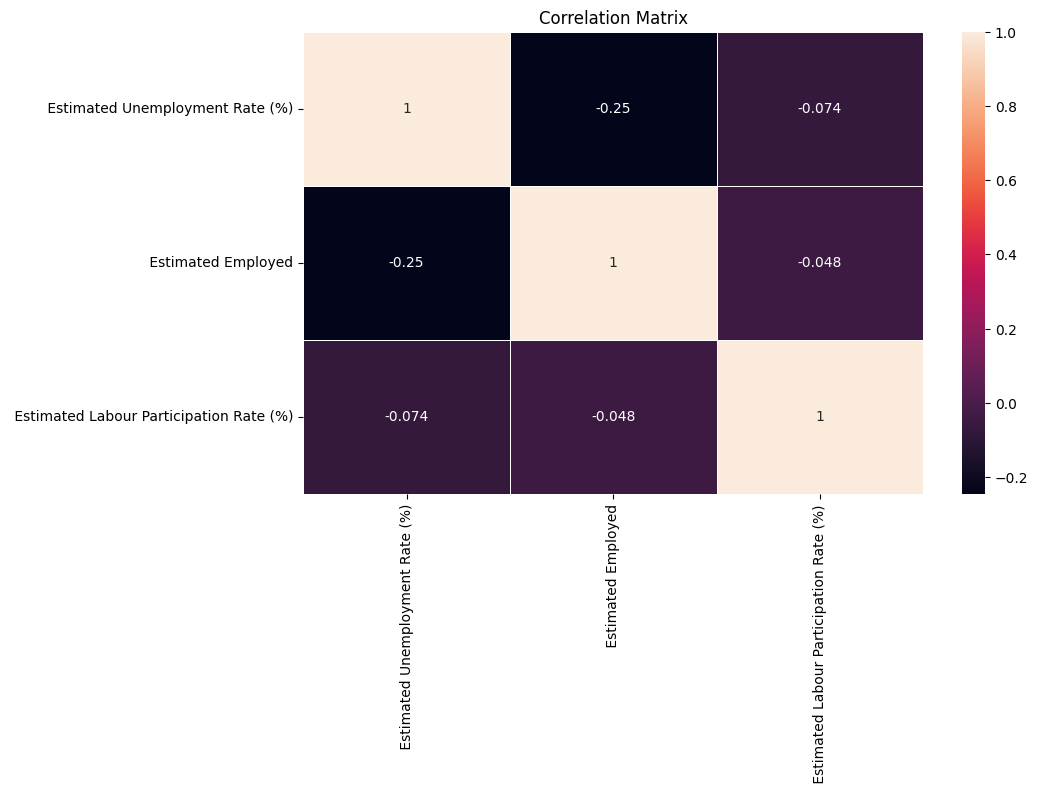

In [ ]:
# Heatmap
plt.figure(figsize=(10, 6))
corr = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

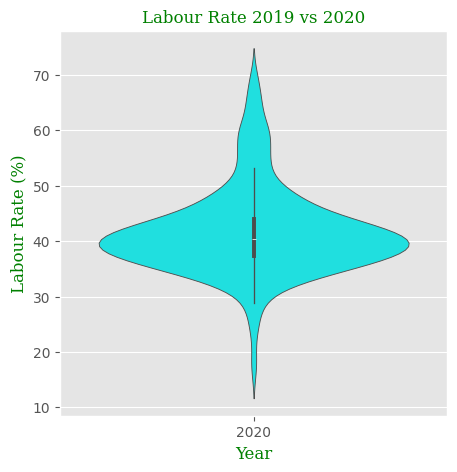

In [ ]:
# Analysing the 'Labour Rate' column with Violin Plot

plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.violinplot(y = df['Est_Labour_Rate'], x = df['Year'], color ='cyan')

font = {'family': 'serif', 'color': 'green', 'weight': 'normal', 'size': 12}
plt.xlabel('Year', fontdict=font)
plt.ylabel('Labour Rate (%)', fontdict=font)
plt.title('Labour Rate 2019 vs 2020', fontdict=font)
plt.show()

In [ ]:
avg_unemployement_over_time = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployement_over_region = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_people_employed_over_region = df.groupby('Region')[' Estimated Employed'].mean().sort_values(ascending=False).reset_index()
avg_labour_part_rate_over_region = df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_unemployement_area_wise = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).reset_index()
highest_unemployement_rate_month = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].max().sort_values(ascending=False).reset_index()

# print all the dataframes
print("Average Unemployment Rate over time\n", avg_unemployement_over_time)
print("\nAverage Unemployment Rate over Region\n", avg_unemployement_over_region)
print("\nAverage People employed over Region\n", avg_people_employed_over_region)
print("\nAverage Labour Participation Rate over Region\n", avg_labour_part_rate_over_region)
print("\nAverage Unemployment Rate over Area\n", avg_unemployement_area_wise)
print("\nHighest Unemployment Rate Month wise\n", highest_unemployement_rate_month)

Average Unemployment Rate over time
           Date   Estimated Unemployment Rate (%)
0   31-05-2020                         23.244444
1   30-04-2020                         22.236154
2   30-06-2020                         10.911111
3   31-03-2020                         10.782593
4   31-08-2020                         10.313333
5   31-07-2020                          9.834444
6   29-02-2020                          9.266154
7   31-01-2020                          9.196538
8   30-09-2020                          8.705926
9   31-10-2020                          8.026296

Average Unemployment Rate over Region
               Region   Estimated Unemployment Rate (%)
0            Haryana                         27.477000
1            Tripura                         25.055000
2          Jharkhand                         19.539000
3              Bihar                         19.471000
4              Delhi                         18.414000
5         Puducherry                         17.942000

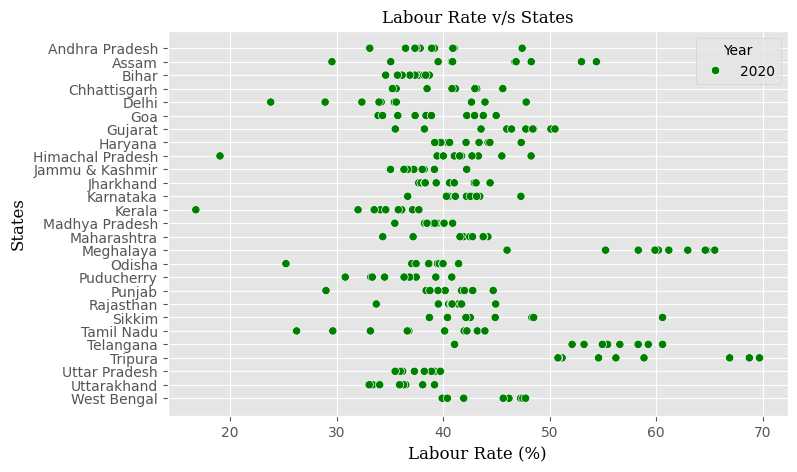

In [ ]:
# Scatter plot of labour Rate by State

plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Labour_Rate'], y = df['States'], hue = df['Year'], palette =['green','red'])

font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.xlabel('Labour Rate (%)', fontdict=font)
plt.ylabel('States', fontdict=font)
plt.title('Labour Rate v/s States', fontdict=font)
plt.show()

In [ ]:
# Scatter matrix cosidering the employed and unemployed rates

fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate'],
                        color='States')
fig.show()

In [ ]:
#After Effects of Lockdown


df2 = pd.read_csv('/content/Unemployment in India.csv')
df2 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
df2.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74


In [ ]:
df2['Region'].nunique() #There are 27 different regions present in the dataset.

27

In [ ]:
print(f"The number of Rows : {df2.shape[0]}\nThe number of columns : {df2.shape[1]}")

The number of Rows : 267
The number of columns : 9


In [ ]:
new_columns = list(df2.columns)
new_columns = [col.strip() for col in new_columns]
df2.columns = new_columns

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df2.drop(['Frequency','Region.1','latitude','longitude'], axis = 1, inplace = True)

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year
df2['MM YYYY'] = df2['Date'].dt.strftime('%m-%Y')
df.head()

,States,Date,Frequency,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Region.1,longitude,latitude,Year
0,Andhra Pradesh,2020-01-31,M,5.48,16.64,41.02,South,15.9129,79.74,2020
1,Andhra Pradesh,2020-02-29,M,5.83,16.55,40.90,South,15.9129,79.74,2020
2,Andhra Pradesh,2020-03-31,M,5.79,15.88,39.18,South,15.9129,79.74,2020
3,Andhra Pradesh,2020-04-30,M,20.51,11.34,33.10,South,15.9129,79.74,2020
4,Andhra Pradesh,2020-05-31,M,17.43,12.99,36.46,South,15.9129,79.74,2020


In [ ]:
after = df2[df2.Month >= 5]

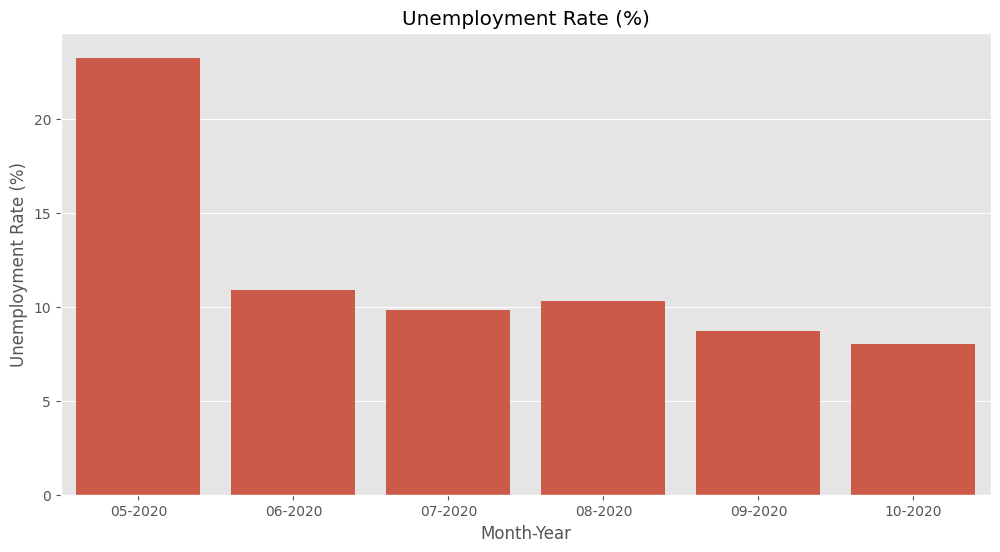

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Unemployment Rate (%)', data = after, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate (%)");

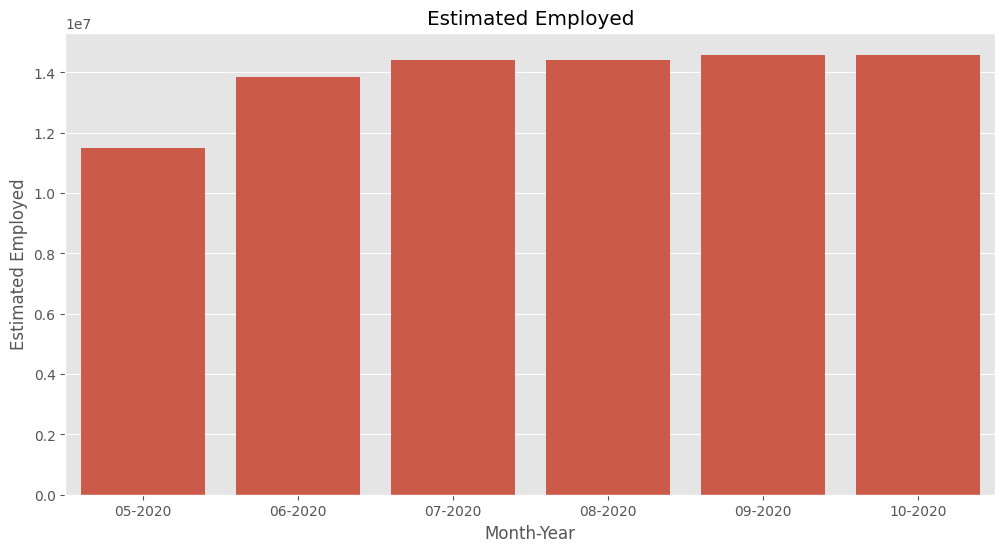

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Employed', data = after, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Estimated Employed')
plt.title("Estimated Employed");

#The Employed Population is around 1.39 crores - 1.43 crores after lockdown. During Lockdown, it was 1.28 crores.

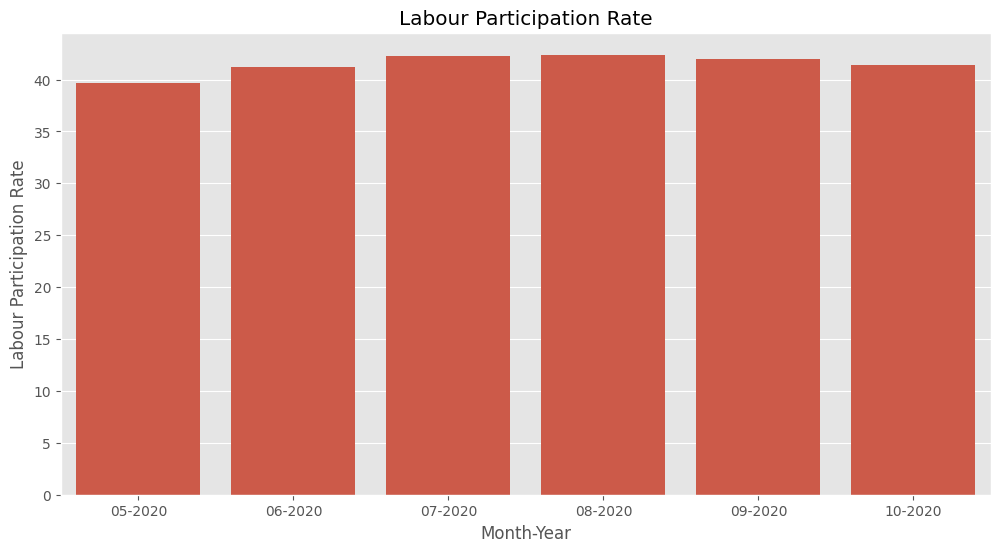

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Labour Participation Rate (%)', data = after, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate')
plt.title("Labour Participation Rate");

#There seems to be no much difference in the Labor Participation after lockdown.

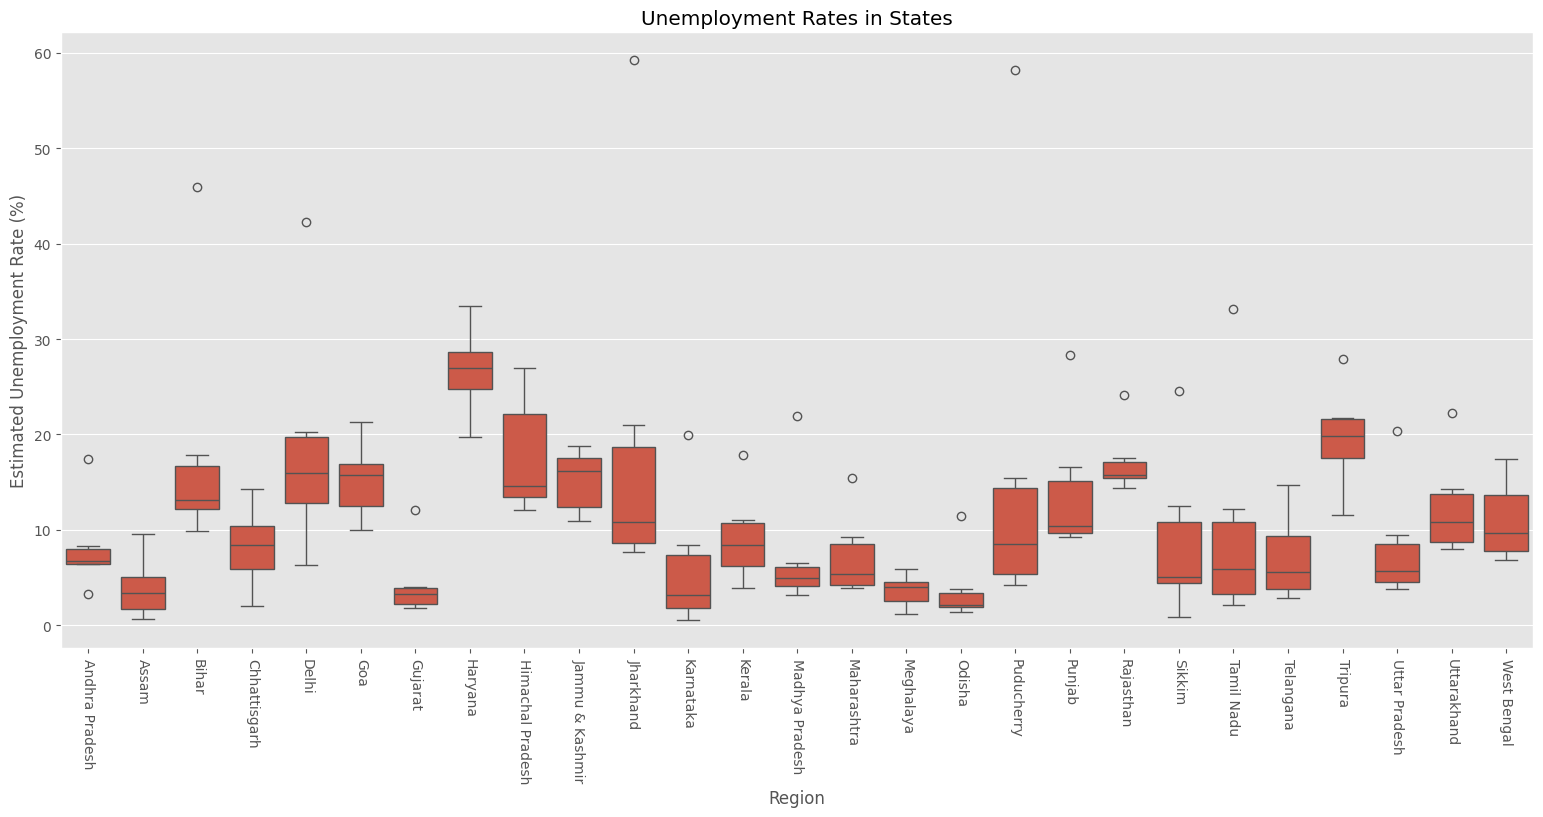

In [ ]:
plt.figure(figsize=(19, 8))

sns.boxplot(after, x = 'Region', y = 'Estimated Unemployment Rate (%)')
plt.xticks(rotation = -90)
plt.title("Unemployment Rates in States");